<a href="https://colab.research.google.com/github/FYCodeLab/intro-biopython/blob/main/BioPython_Mammoth_Viz_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Carte génétique du génome mitochondrial du mammouth](https://raw.githubusercontent.com/FYCodeLab/intro-biopython/main/assets/intromamm.png)


![Installation dans Colab](https://raw.githubusercontent.com/FYCodeLab/intro-biopython/main/assets/step1pack.png)


First we will *install* Biopython, a useful package (or library) that provides tools for working with scientific articles fom PubMed or with biological data — such as DNA sequences, GenBank files etc...
Biopython is really easy !

Let’s start by installing it. In python, the command `pip install` is used to install a library

In [1]:
#Let's install the biopython package (library) !
pip install biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 16.4 MB/s eta 0:00:00


![Installation dans Colab](https://raw.githubusercontent.com/FYCodeLab/intro-biopython/main/assets/step2down.png)


## 📥 Step 2: Download the Mammoth Mitochondrial Genome Using Biopython

In this  step, we'll use **Biopython** to connect to the **NCBI database** (National Center for Biotechnology Information) and automatically retrieve the **complete mitochondrial genome** of the woolly mammoth (*Mammuthus primigenius*).

We’ll use the `Entrez` module from Biopython, which allows us to search and download biological data — just like using the NCBI website, but directly from Python!

---

### ⚙️ What does this script do?

- It sends a search query to NCBI to find the **complete mitochondrial genome** of the mammoth.
- It retrieves a list of matching entries (up to 5).
- It selects the **most relevant result** (the first one).
- It **downloads the GenBank file** for that result.
- It **saves the file locally** in your Colab environment for later use.

---

### 📦 Why GenBank format?

The **GenBank (.gb)** format includes:
- The full **DNA sequence**
- **Annotations** (genes, CDS, tRNAs, etc.)
- Metadata such as organism name, accession number, and references

It's one of the most commonly used formats in bioinformatics.

---

### 🧪 What will you get?

At the end of this step, a file named:
`mammoth_mitochondrial_genome.gb`

the file is placed in the **📁 folder section** on the left of the screen



In [8]:
# On importe le module Entrez de Biopython, qui permet de se connecter aux bases de données de NCBI
from Bio import Entrez

# NCBI demande que chaque utilisateur s'identifie avec un e-mail valide
Entrez.email = "your.email@example.com"  # Remplacer par votre adresse

# Message d'information pour suivre les étapes dans la console
print("🔍 Je cherche le génome mitochondrial complet du mammouth sur NCBI...")

# On définit la requête : on veut un génome mitochondrial complet de Mammuthus primigenius
search_term = "Mammuthus primigenius[Organism] AND mitochondrion[Filter] AND complete genome"

# On effectue une recherche dans la base "nucleotide" avec notre requête
handle = Entrez.esearch(db="nucleotide", term=search_term, retmax=5)  # On demande jusqu'à 5 résultats pour voir ce qui existe
record = Entrez.read(handle)
handle.close()

# On affiche le nombre de résultats trouvés
print(f"✅ J'ai trouvé {len(record['IdList'])} fichier(s) correspondant(s).")

# On prend le premier identifiant (le plus pertinent selon NCBI)
mammoth_id = record["IdList"][0]
print(f"📄 Je vais télécharger le fichier GenBank correspondant à l'ID : {mammoth_id}")

# On télécharge les données GenBank du premier résultat
handle = Entrez.efetch(db="nucleotide", id=mammoth_id, rettype="gb", retmode="text")
genbank_data = handle.read()
handle.close()

# On enregistre le contenu dans un fichier local
file_name = "mammoth_mitochondrial_genome.gb"
with open(file_name, "w") as file:
    file.write(genbank_data)

# Message final pour dire que tout s’est bien passé
print(f"💾 Fichier téléchargé et enregistré sous le nom : {file_name}")


🔍 Je cherche le génome mitochondrial complet du mammouth sur NCBI...
✅ J'ai trouvé 5 fichier(s) correspondant(s).
📄 Je vais télécharger le fichier GenBank correspondant à l'ID : 124056416
💾 Fichier téléchargé et enregistré sous le nom : mammoth_mitochondrial_genome.gb


![Installation dans Colab](https://raw.githubusercontent.com/FYCodeLab/intro-biopython/main/assets/step3viz.png)


## 🧬 Step 3: Visualize the Mammoth Mitochondrial Genome

Now that we've downloaded the GenBank file for the mammoth's mitochondrial genome, it's time to **visualize its genes**!

We will use the great `dna-features-viewer` library, which allows us to create clean, modern diagrams of annotated DNA sequences. This is perfect for beginners who want to **see where the genes are** along a sequence.

Let's install the `dna-features-viewer` library

In [5]:
#Install the library `dna-features-viewer`
pip install dna_features_viewer

## 🧬Visualising the content of the GenBank file
---

### 🛠 What does this script do?

- It opens the **GenBank file** `mammoth_mitochondrial_genome.gb`we downloaded earlier.
- It reads all the annotated features in the file (like genes, CDS, etc.).
- It filters to show only the **genes**.
- For each gene, it creates a **colored box** that represents:
  - The position of the gene on the DNA
  - The strand it is on (forward or reverse)
  - Its name as a label
- It draws a **linear map** of the genome, showing all genes with their names and directions.

---

### 🖼 What will you see?

A horizontal diagram generated from the content of the gb file `mammoth_mitochondrial_genome.gb`



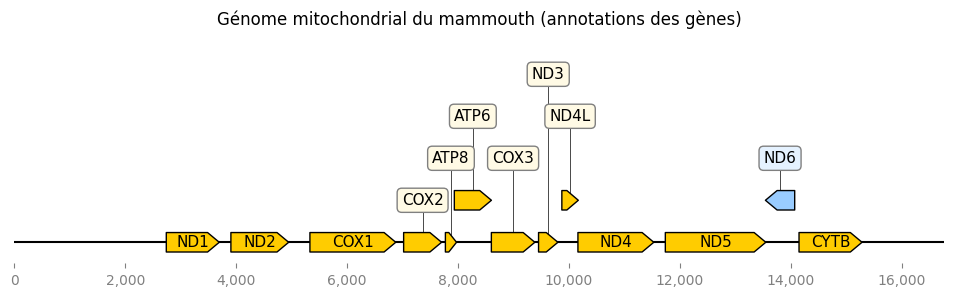

In [7]:
# Importation des bibliothèques nécessaires
from dna_features_viewer import GraphicFeature, GraphicRecord  # Pour dessiner la carte génétique
from Bio import SeqIO  # Pour lire des fichiers GenBank
import matplotlib.pyplot as plt  # Pour afficher le graphique

# Lecture du fichier GenBank contenant le génome mitochondrial du mammouth
record = SeqIO.read("mammoth_mitochondrial_genome.gb", "genbank")

# Création d'une liste pour stocker les éléments génétiques à afficher
features = []

# Parcours de toutes les annotations présentes dans le fichier
for feature in record.features:
    # On sélectionne uniquement les éléments de type "gene" ayant un nom
    if feature.type == "gene" and "gene" in feature.qualifiers:
        # On crée un objet graphique pour représenter chaque gène
        features.append(
            GraphicFeature(
                start=int(feature.location.start),  # Position de début du gène
                end=int(feature.location.end),      # Position de fin du gène
                strand=feature.strand,              # Brin (+1 ou -1)
                color="#ffcc00" if feature.strand == 1 else "#99ccff",  # Couleur selon le sens
                label=feature.qualifiers["gene"][0]  # Nom du gène affiché comme étiquette
            )
        )

# Création d'un enregistrement graphique avec la longueur totale de la séquence
graphic_record = GraphicRecord(
    sequence_length=len(record.seq),  # Longueur du génome
    features=features                 # Liste des éléments graphiques à dessiner
)

# Tracé du graphique avec une largeur en pouces (modifiable)
ax, _ = graphic_record.plot(figure_width=12)

# Ajout d’un titre au graphique
plt.title("Génome mitochondrial du mammouth (annotations des gènes)")

# Affichage du graphique
plt.show()
